### Suicide rates among teenagers


Import libraries:

In [1]:
library(tidyverse)
library(readr)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Load file and check it.

In [2]:
suicide <- read_csv(
  "https://data.gov.au/data/dataset/488ef6d4-c763-4b24-b8fb-9c15b67ece19/resource/edcbc14c-ba7c-44ae-9d4f-2622ad3fafe0/download/aihw-phe-229-grim-data-gov-au-2024.csv",
  locale = locale(encoding = "UTF-8")
)

head(suicide)

Rows: 373141 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): grim, cause_of_death, sex, age_group
dbl (4): year, deaths, crude_rate_per_100000, age_standardised_rate_per_100000

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


grim,cause_of_death,year,sex,age_group,deaths,crude_rate_per_100000,age_standardised_rate_per_100000
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GRIM0000,All causes combined,1907,Males,0–4,6482,2604.0,NA
GRIM0000,All causes combined,1907,Males,5–9,473,205.1,NA
GRIM0000,All causes combined,1907,Males,10–14,366,168.4,NA
GRIM0000,All causes combined,1907,Males,15–19,569,266.8,NA
GRIM0000,All causes combined,1907,Males,20–24,763,366.8,NA
GRIM0000,All causes combined,1907,Males,25–29,723,388.5,NA


Check age group and cause of death options:

In [3]:
unique(suicide$age_group)
unique(suicide$cause_of_death)

[1] "0–4"   "5–9"   "10–14" "15–19" "20–24" "25–29" "30–34" "35–39" "40–44"
[10] "45–49" "50–54" "55–59" "60–64" "65–69" "70–74" "75–79" "80–84" "85+"  
[19] "Total"

[1] "All causes combined"                                                                                    
 [2] "Dementia including Alzheimer's disease"                                                                 
 [3] "Chronic kidney disease"                                                                                 
 [4] "All certain infectious and parasitic diseases"                                                          
 [5] "Vaccine-preventable diseases"                                                                           
 [6] "All neoplasms"                                                                                          
 [7] "Breast cancer"                                                                                          
 [8] "Lung cancer"                                                                                            
 [9] "Melanoma"                                                                                               
[10] "Pancreatic cancer"                                                                                      
[11] "Prostate cancer"                                                                                        
[12] "Skin cancer"                                                                                            
[13] "Colorectal cancer"                                                                                      
[14] "All diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism"
[15] "All endocrine, nutritional and metabolic diseases"                                                      
[16] "Diabetes"                                                                                               
[17] "All mental and behavioural disorders"                                                                   
[18] "All diseases of the nervous system"                                                                     
[19] "Motor neurone disease"                                                                                  
[20] "All diseases of the eye and adnexa"                                                                     
[21] "All diseases of the ear and mastoid process"                                                            
[22] "All diseases of the circulatory system"                                                                 
[23] "Cerebrovascular disease"                                                                                
[24] "Heart failure"                                                                                          
[25] "Hypertensive disease"                                                                                   
[26] "Coronary heart disease"                                                                                 
[27] "Stroke"                                                                                                 
[28] "All diseases of the respiratory system"                                                                 
[29] "Asthma"                                                                                                 
[30] "Chronic obstructive pulmonary disease (COPD)"                                                           
[31] "Influenza"                                                                                              
[32] "Influenza and pneumonia"                                                                                
[33] "Selected respiratory conditions"                                                                        
[34] "Acute severe asthma"                                                                                    
[35] "Coronavirus disease 2019 (COVID-19)"                                                                    
[36] "All diseases of the digestive system"                                                                   
[37] 

We filtered the dataset to include only the rows where the "cause_of_death" column contains the term "Suicide".

In [4]:
suicide <- suicide %>%
  filter(str_detect(cause_of_death, "suicide"))
head(suicide, 10)

grim,cause_of_death,year,sex,age_group,deaths,crude_rate_per_100000,age_standardised_rate_per_100000
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GRIM2017,Intentional self-harm (suicide),1907,Males,55–59,30,46.4,NA
GRIM2017,Intentional self-harm (suicide),1907,Males,5–9,0,0.0,NA
GRIM2017,Intentional self-harm (suicide),1907,Females,0–4,0,0.0,NA
GRIM2017,Intentional self-harm (suicide),1907,Females,10–14,1,0.5,NA
GRIM2017,Intentional self-harm (suicide),1907,Males,60–64,29,58.5,NA
GRIM2017,Intentional self-harm (suicide),1907,Males,65–69,17,42.7,NA
GRIM2017,Intentional self-harm (suicide),1907,Males,85+,2,67.8,NA
GRIM2017,Intentional self-harm (suicide),1907,Females,15–19,4,1.9,NA
GRIM2017,Intentional self-harm (suicide),1907,Females,20–24,13,6.4,NA


Additionally, we transformed the "cause_of_death" column to explicitly set the value as "Suicide" for all rows, ensuring consistency across the dataset. This step ensures that the dataset contains only data relevant to suicides for our analysis.

In [5]:
suicide <- suicide %>%
  mutate(cause_of_death = "Suicide")

We filtered the dataset to include only the rows where the "year" is greater than or equal to 2000 and less than 2022. Data for the year 2022 was excluded due to its incompleteness. This time frame was selected because it marks the period when internet usage became widespread, making it relevant for our analysis.

In [6]:
suicide <- suicide %>%
  filter(year>=2000)
head(suicide, 10)

grim,cause_of_death,year,sex,age_group,deaths,crude_rate_per_100000,age_standardised_rate_per_100000
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GRIM2017,Suicide,2000,Males,0–4,0,0.0,NA
GRIM2017,Suicide,2000,Males,5–9,1,0.1,NA
GRIM2017,Suicide,2000,Males,10–14,6,0.9,NA
GRIM2017,Suicide,2000,Males,15–19,89,13.2,NA
GRIM2017,Suicide,2000,Males,20–24,175,26.9,NA
GRIM2017,Suicide,2000,Males,25–29,235,32.8,NA
GRIM2017,Suicide,2000,Males,30–34,241,34.2,NA
GRIM2017,Suicide,2000,Males,35–39,234,31.4,NA
GRIM2017,Suicide,2000,Males,40–44,210,29.3,NA


We selected columns 3 to 7 from the dataset to focus on the most relevant information for our analysis. This step narrows down the data to the specific columns needed for further analysis.

In [7]:
suicide <- suicide %>%
  select(3:7)
head(suicide, 10)

year,sex,age_group,deaths,crude_rate_per_100000
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2000,Males,0–4,0,0.0
2000,Males,5–9,1,0.1
2000,Males,10–14,6,0.9
2000,Males,15–19,89,13.2
2000,Males,20–24,175,26.9
2000,Males,25–29,235,32.8
2000,Males,30–34,241,34.2
2000,Males,35–39,234,31.4
2000,Males,40–44,210,29.3


We filtered the dataset to focus on specific age groups, selecting individuals in the age ranges of 10–14, 15–19, and 20–24. These groups represent teenagers and young adults, which are the focus of our analysis.

In [8]:
suicide_teens <- suicide%>%
  filter(age_group %in% c(  "10–14",   "15–19" ,  "20–24"  ))
head(suicide_teens)

year,sex,age_group,deaths,crude_rate_per_100000
<dbl>,<chr>,<chr>,<dbl>,<dbl>
2000,Males,10–14,6,0.9
2000,Males,15–19,89,13.2
2000,Males,20–24,175,26.9
2000,Females,10–14,1,0.2
2000,Females,15–19,41,6.4
2000,Females,20–24,34,5.4


We then further filtered the data to exclude any records from 2022 and grouped the dataset by year and age group. The deaths and crude rates per 100,000 were summed within each group to provide an aggregated view of suicide rates in these age groups over time.

In [9]:
suicide_teens_general <- suicide_teens%>%
  filter(year<2022)%>%
  group_by(year, age_group)%>%
  summarise(death = sum(deaths),
            rate = sum(crude_rate_per_100000))
head(suicide_teens_general,10)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,age_group,death,rate
<dbl>,<chr>,<dbl>,<dbl>
2000,10–14,14,1.6
2000,15–19,260,29.5
2000,20–24,418,48.6
2001,10–14,20,2.2
2001,15–19,240,26.7
2001,20–24,438,50.7
2002,10–14,16,1.8
2002,15–19,248,27.4
2002,20–24,388,43.9


We saved the resulting dataframe as a CSV file.

In [10]:
suicide_teens_general <- suicide_teens_general%>%
  ungroup() %>%
  mutate(id = row_number())
write.csv(suicide_teens_general, "suicide.csv", row.names = FALSE)

Analyse and visualisation
Number of death:

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message in grDevices::dev.off():
"agg could not write to the given file"


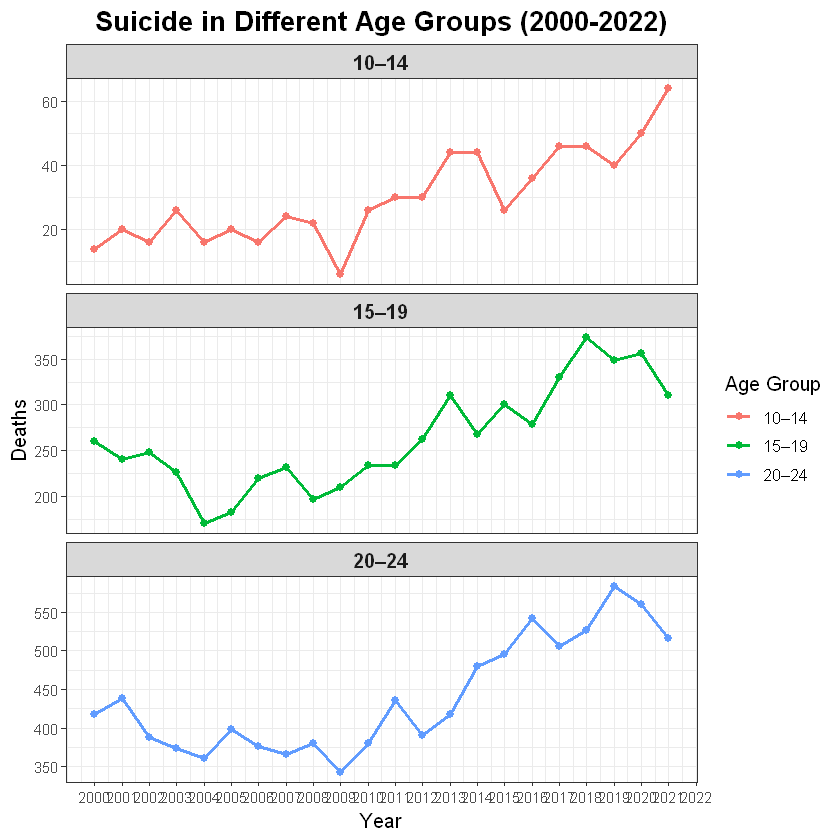

In [11]:
plot1 <- ggplot(suicide_teens_general, aes(x = year, y = death, color = age_group, group = age_group)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Suicide in Different Age Groups (2000-2022)",
    x = "Year",
    y = "Deaths",
    color = "Age Group"
  ) +
  facet_wrap(~ age_group, scales = "free_y", ncol = 1)+ 
  scale_x_continuous(breaks = seq(2000, 2022, by = 1)) + 
  theme_bw() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    strip.text = element_text(size = 12, face = "bold")
  )
plot1
ggsave("suicide_trends.png", plot = plot1, width = 10, height = 7, dpi = 300)

suicide rate per 100000

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

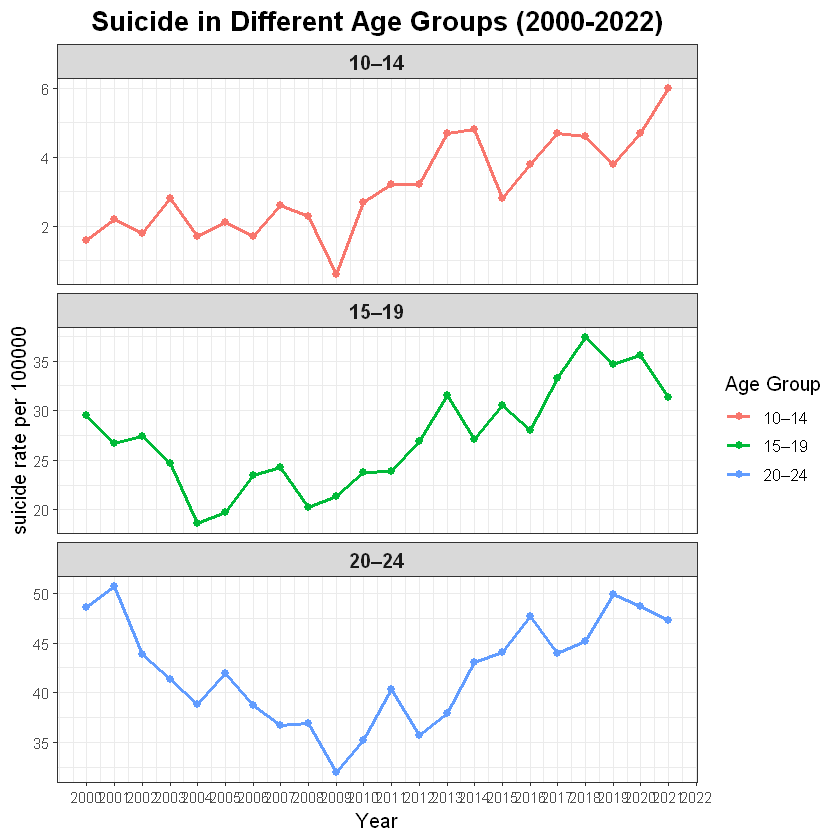

In [12]:
ggplot(suicide_teens_general, aes(x = year, y = rate, color = age_group, group = age_group)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Suicide in Different Age Groups (2000-2022)",
    x = "Year",
    y = "suicide rate per 100000",
    color = "Age Group"
  ) +
  facet_wrap(~ age_group, scales = "free_y", ncol = 1)+ 
  scale_x_continuous(breaks = seq(2000, 2022, by = 1)) + 
  theme_bw() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    strip.text = element_text(size = 12, face = "bold") # Настройка заголовков фасетов
  )

 Both charts indicate a significant increase in suicide rates among teenagers in recent years.

We changed format of the dataframe.

In [13]:
library(tidyr)
suicide_teen2 <- suicide_teens_general %>%
  pivot_wider(
    names_from = age_group, 
    values_from = c(death, rate), 
    names_sep = "_" 
  )
head(suicide_teen2,10)

year,id,death_10–14,death_15–19,death_20–24,rate_10–14,rate_15–19,rate_20–24
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,1,14,NA,NA,1.6,NA,NA
2000,2,NA,260,NA,NA,29.5,NA
2000,3,NA,NA,418,NA,NA,48.6
2001,4,20,NA,NA,2.2,NA,NA
2001,5,NA,240,NA,NA,26.7,NA
2001,6,NA,NA,438,NA,NA,50.7
2002,7,16,NA,NA,1.8,NA,NA
2002,8,NA,248,NA,NA,27.4,NA
2002,9,NA,NA,388,NA,NA,43.9


### Google trend data

Load google trend data. The file tracks search interest over time for the keyword "cyberbullying", which will help us understand public awareness and concern around this topic.

In [14]:
google_c <- read.csv("../data/multiTimeline.csv", fileEncoding = "UTF-8", skip = 1)
head(google_c, 10)

,Month,cyberbullying...Australia.
,<chr>,<int>
1,2004-01,0
2,2004-02,0
3,2004-03,0
4,2004-04,0
5,2004-05,0
6,2004-06,0
7,2004-07,0
8,2004-08,0
9,2004-09,0


We separated the original column containing both the date and search interest value into two distinct columns: month and case. Then, we removed the first row, which contained header-like information, and kept only the actual data.

In [15]:
colnames(google_c) <- c("month", "case")
head(google_c)

,month,case
,<chr>,<int>
1,2004-01,0
2,2004-02,0
3,2004-03,0
4,2004-04,0
5,2004-05,0
6,2004-06,0


Next, we further split the month column into two separate columns: year and month, to facilitate time-series analysis and easier aggregation by year or month.

In [16]:
google_c <- separate(google_c, "month",
c("year", "month"),
sep = "-"
)
head(google_c)

,year,month,case
,<chr>,<chr>,<int>
1,2004,01,0
2,2004,02,0
3,2004,03,0
4,2004,04,0
5,2004,05,0
6,2004,06,0


We converted the year and case columns to numeric format to enable correct filtering and numerical operations.
We removed the year 2025 from the dataset since it contains incomplete data. Then, we grouped the remaining data by year and calculated the total number of searches for the term "cyberbullying" per year to observe trends over time.

In [17]:
google_c$year<- as.numeric(google_c$year)
google_c$case<- as.numeric(google_c$case)

google_c <- google_c%>%
  filter(year<2025)%>%
  group_by(year)%>%
  summarise(search = sum(case))
head(google_c,10)

year,search
<dbl>,<dbl>
2004,0
2005,34
2006,0
2007,15
2008,158
2009,376
2010,618
2011,519
2012,545


Visualisation

Warning message in grDevices::dev.off():
"agg could not write to the given file"


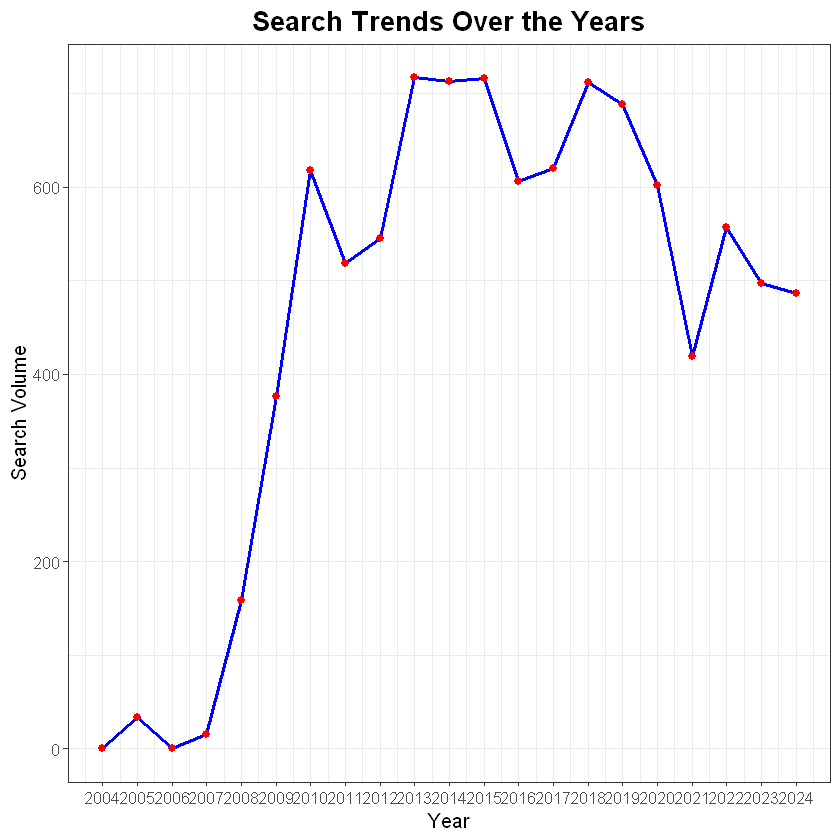

In [18]:
plot2 <- ggplot(google_c, aes(x = year, y = search)) +
  geom_line(color = "blue", size = 1) + 
  geom_point(color = "red", size = 2) + 
  scale_x_continuous(breaks = seq(min(google_c$year), max(google_c$year), by = 1)) + 
  labs(
    title = "Search Trends Over the Years",
    x = "Year",
    y = "Search Volume"
  ) +
  theme_bw() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )
plot2

ggsave("search.png", plot = plot2, width = 10, height = 7, dpi = 300)


We created a graph displaying the search volume over the years, which shows a significant increase in searches in recent years, with a slight decline in 2021.

We performed an inner join between the dataset containing suicide rates among teenagers and young adults   and the dataset with annual Google search volumes for the term "cyberbullying" , using the common column year. This allowed us to combine suicide statistics with public interest in cyberbullying for further analysis.

In [19]:
suic_google <- inner_join(suicide_teen2, google_c, by = 'year')
head(suic_google,10)

year,id,death_10–14,death_15–19,death_20–24,rate_10–14,rate_15–19,rate_20–24,search
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004,13,16,NA,NA,1.7,NA,NA,0
2004,14,NA,170,NA,NA,18.6,NA,0
2004,15,NA,NA,360,NA,NA,38.8,0
2005,16,20,NA,NA,2.1,NA,NA,34
2005,17,NA,182,NA,NA,19.7,NA,34
2005,18,NA,NA,398,NA,NA,41.9,34
2006,19,16,NA,NA,1.7,NA,NA,0
2006,20,NA,220,NA,NA,23.5,NA,0
2006,21,NA,NA,376,NA,NA,38.7,0


After merging the datasets, we ungrouped the data and added a new column containing row numbers to serve as id. Finally, we exported the resulting dataset as a CSV file for use in further analysis or visualisation.

In [20]:
suic_google <- suic_google%>%
  ungroup() %>%
  mutate(id = row_number())
write.csv(suic_google, "sui_google.csv", row.names = FALSE)

Calculate correlation

In [21]:
correlations <- cor(suic_google$`death_15–19`, suic_google$`search`, use = "complete.obs")


correlations

[1] 0.7662766

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 36 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 36 rows containing missing values (`geom_point()`)."


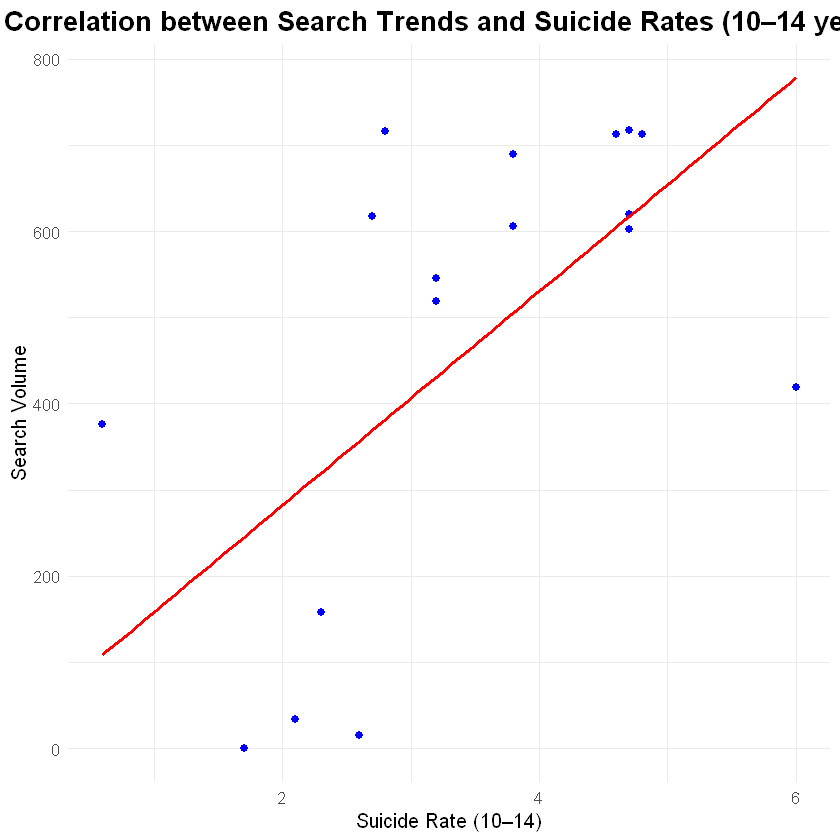

In [22]:
ggplot(suic_google, aes(x = `rate_10–14`, y = search)) +
  geom_point(color = "blue", size = 2) + 
  geom_smooth(method = "lm", color = "red", se = FALSE) + 
  labs(
    title = "Correlation between Search Trends and Suicide Rates (10–14 years)",
    x = "Suicide Rate (10–14)",
    y = "Search Volume"
  ) +
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 36 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 36 rows containing missing values (`geom_point()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 36 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 36 rows containing missing values (`geom_point()`)."
Warning message in grDevices::dev.off():
"agg could not write to the given file"


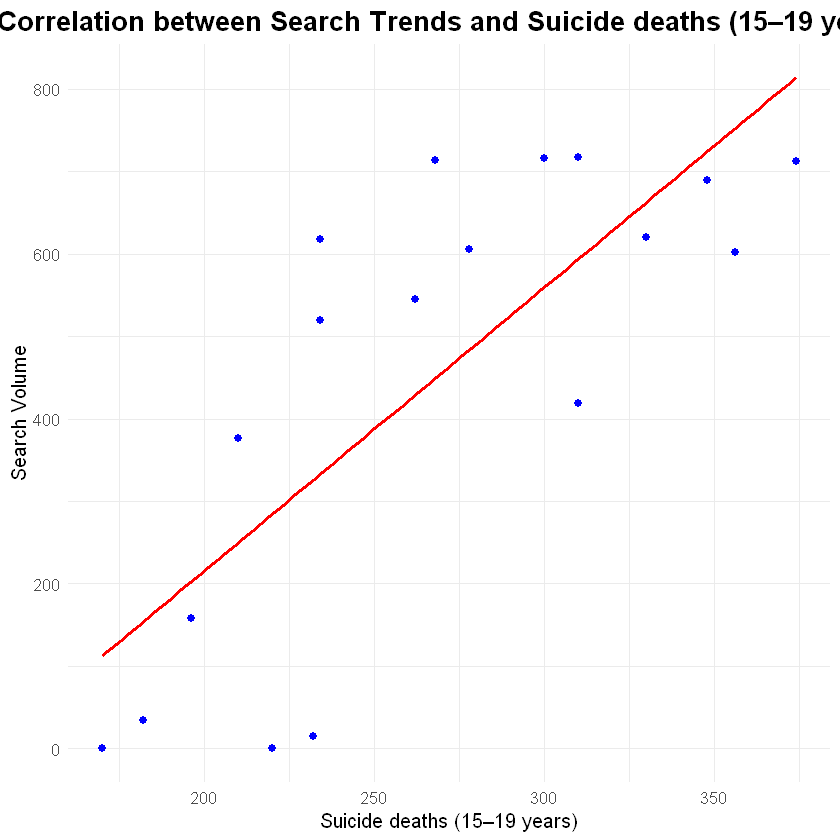

In [23]:
plot3<- ggplot(suic_google, aes(x = `death_15–19`, y = search)) +
  geom_point(color = "blue", size = 2) + 
  geom_smooth(method = "lm", color = "red", se = FALSE) + 
  labs(
    title = "Correlation between Search Trends and Suicide deaths (15–19 years)",
    x = "Suicide deaths (15–19 years)",
    y = "Search Volume"
  ) +
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )
plot3

ggsave("suicide_cor.png", plot = plot3, width = 10, height = 7, dpi = 300)

By merging the two datasets, we performed a correlation analysis and found a strong positive relationship between suicide rates among teens and the frequency of cyberbullying search queries, with correlation values ranging from 0.62 to 0.77 across different age groups. This indicates that as interest in cyberbullying increases in online searches, suicide rates among teens tend to rise as well. While this suggests a notable connection, it's essential to remember that correlation does not prove causality, and further investigation is needed to fully understand the reasons behind this association.